# Projeto Final de Machine Learning

### Alunos: André Mestriner Costa e Felipe Schiavinato Borges Souza



## Introdução

O objetivo deste trabalho é criar uma aplicação de Machine Learning capaz de recomendar musicas para um usuário baseado em seu histórico de escuta. E criar uma rede neural capaz de prever a popularidade de uma musica, dado suas características. Para isso, utilizaremos o dataset *spotify tracks dataset* disponibilizado no Kaggle atravez do link abaixo:

https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

Imports:

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv('spotify_data.csv')

## Análise Exploratória de Dados

A base de dados escolhida foi feita em 22/10/22 atravez do *Spotify Web API* segundo o proprio autor. Alem disso ela nao possui todas as musicas da plataforma, o que no nosso caso nao sera um problema pois contem 114 mil musicas com 21 colunas de caracteristicas sobre a mesma.

In [98]:
df.shape

(114000, 21)

As colunas dessa base de dado contem as seguintes informações:

- **track_id:** id da musica no spotify
- **artists** artista
- **album_name** album em que a musica esta
- **track_name** nome da musica
- **popularity** uma medida de popularidade da musica a partir de quantas vezes e quando ela foi escutada. Essa medida possui um valor arbitrário entre 0 a 100 de o quão popular uma musica é, quanto maior mais popular.
- **duration_ms** duração em milissegundos
- **explicit** se a musica contem uma letra explicita
- **danceability** uma medida arbitraria do algoritmo do spotify para identificar o quão adequada a musica é para dançar, o valor vai de 0 a 1.  
- **energy** uma medida arbitraria do algoritmo do spotify para identificar o quão intensa e energética é a musica, o valor vai de 0 a 1.  
- **key** qual escala musical a musica esta (0 = C, 1 = C#, 2 = D...)
- **loudness** a media de decibéis
- **mode** indica se esta em uma escala maior (1) ou menor (0)
- **speechiness** indica a presença de falas na musica, o valor vai de 0 a 1 sendo musicas acima de 0.66 provavelmente sao feitas apenas de falas (podcasts), entre 0.33 e 0.66 uma mistura (rap music) e valores abaixo de 0.33 sao musicas com letras ou sem letra.
- **acousticness** uma medida arbitraria do algoritmo do spotify para identificar se a musica é acústica, o valor vai de 0 a 1. 
- **instrumentalness** uma medida arbitraria do algoritmo do spotify para musicas instrumentais, o valor vai de 0 a 1. 
- **liveness** uma medida arbitraria do algoritmo do spotify para identificar se a musica é de um show, o valor vai de 0 a 1, assim quanto maior o valor mais provável a musica foi feita em um show e nao em um estúdio. 
- **valence** uma medida arbitraria do algoritmo do spotify para identificar musicas com uma energia mais positiva e alegre, o valor vai de 0 a 1. 
- **tempo** o bpm da musica
- **time_signature** quantas batidas em um tempo (3 a 7)
- **track_genre** gênero musical


Com essa descrição, vamos verificar os elementos com speechless acima de 0.66,pois pela descrição a probabilidade de nao ser uma musica é alta.

In [99]:
df[df['speechiness'] > 0.66]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1321,1321,5e0gqHWLLKQgPcqXMuTeWH,Afrocidade,Vivão,Vivão (vinheta),22,69942,False,0.483,0.8870,...,-8.489,0,0.924,0.977000,0.000231,0.2920,0.613,74.325,4,afrobeat
1492,1492,5TgyYzvxGsPAQwcdpY5f5X,Jorge Drexler,Cara B,Fractura de escafoides tarsiano derecho - Cara B,21,208026,False,0.481,0.4420,...,-20.759,1,0.868,0.507000,0.013900,0.9830,0.709,151.445,4,afrobeat
4073,4073,6MAO6UudIETesH04SFZ5jZ,Mohan;Murali;Chandiran,Em Magan,Varraaru Vaarraaru Yaaru Varraaru,35,299626,False,0.689,0.7570,...,-8.344,1,0.761,0.703000,0.000000,0.3360,0.663,143.070,4,ambient
9152,9152,5QUZjrm4nF5SrT1JEQbhV0,Sant;Stau,"O Que Separa os Homens dos Meninos, Vol. 1",O Que Separa os Homens dos Meninos,49,204000,True,0.641,0.6350,...,-10.050,1,0.868,0.796000,0.000000,0.1040,0.660,80.483,4,brazil
9769,9769,16oVqtzrcrdzQvtIRnA2Wx,Racionais MC's,"Nada Como um Dia Após o Outro Dia, Vol. 1 & 2",De Volta À Cena,44,121853,False,0.794,0.7520,...,-7.935,1,0.853,0.567000,0.000000,0.4790,0.320,158.133,4,brazil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105313,105313,7ahd8hgfj5z3rOhbKdGNJU,Left spectrum of the brain,Brainstem,Brainstem,37,122124,False,0.743,0.3490,...,-19.669,1,0.743,0.874000,0.678000,0.1710,0.516,157.968,4,study
105731,105731,6sdNICeIUKNbOht74Nswg8,Sless Praismo,"Experimentals, Pt. 3",Anoroc,9,114418,False,0.859,0.3740,...,-9.742,0,0.729,0.110000,0.020800,0.0764,0.961,85.868,4,study
110148,110148,2sscCAOTZOYW5N8MlNKbyQ,Armin van Buuren,ASOT 1090 - A State Of Trance Episode 1090,A State Of Trance (ASOT 1090) - Interview with...,35,32169,False,0.625,0.5230,...,-9.239,1,0.830,0.137000,0.000000,0.1080,0.881,142.099,5,trance
110195,110195,5uUYKILx8eE05jnIT4rkuR,Armin van Buuren,ASOT 1090 - A State Of Trance Episode 1090,A State Of Trance (ASOT 1090) - Interview with...,35,31990,False,0.696,0.5900,...,-8.772,1,0.738,0.158000,0.000002,0.3080,0.826,126.326,5,trance


Ao verificar no spotify as musicas com valores bem próximos de 1, a sua grande maioria nao sao musicas, porem proximo da faixa de 0.66 encontramos musicas mais faladas como raps com uma melodia bem proximo ao tom da voz. Dessa maneira apos escutar varias dessas musicas decidimos por passar o filtro em 0.9 , pois existe pouquíssimas musicas que possuem um valor acima de 0,9 apesar de existir alguns podcast e standups que possuem valores inferiores a esse (sao a minoria).

In [100]:
df = df[df['speechiness'] < 0.9]

Apos esse filtro inicial, podemos verificar as colunas em questão.

In [101]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Como podemos observar existem variáveis categóricas e numéricas, dessa maneira vamos separas as duas para fazer uma análise exploratória para cada caso. (Desconsideramos para nossa analise o nome,artista,album e gênero por possuírem vários valores, o que dificultaria uma analise apropriada nesse caso)

### Variáveis Categóricas

In [102]:
def plot_categoricals(data, cols, sorted=True):
    summary = data[cols] \
        .describe() \
        .transpose() \
        .sort_values(by='count')

    print(summary)

    for k, (col, val) in enumerate(summary['count'].items()):
        plt.figure()
        ser = data[col].value_counts()
        if sorted:
            ser = ser.sort_values()
        else:
            ser = ser.sort_index()
        ax = ser.plot.barh()
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(f'{col}, n={int(val)}')
        plt.show()

                   count      mean       std  min  25%  50%  75%   max
key             113366.0  5.310834  3.560905  0.0  2.0  5.0  8.0  11.0
mode            113366.0  0.637246  0.480797  0.0  0.0  1.0  1.0   1.0
time_signature  113366.0  3.906083  0.427468  0.0  4.0  4.0  4.0   5.0


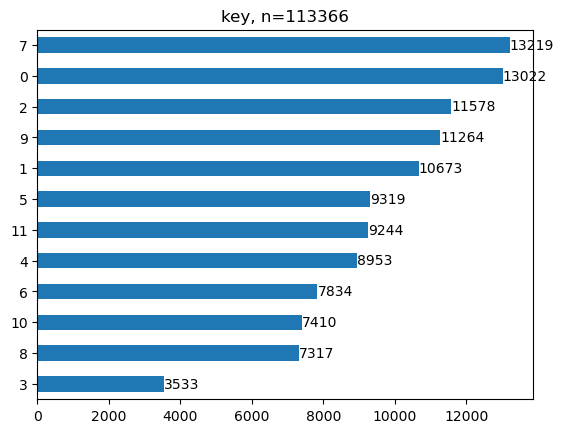

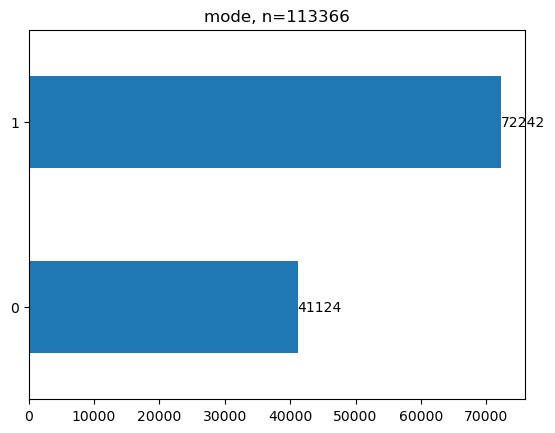

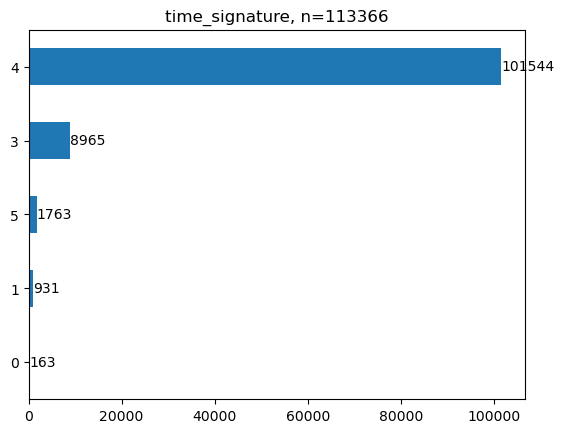

<AxesSubplot:ylabel='explicit'>

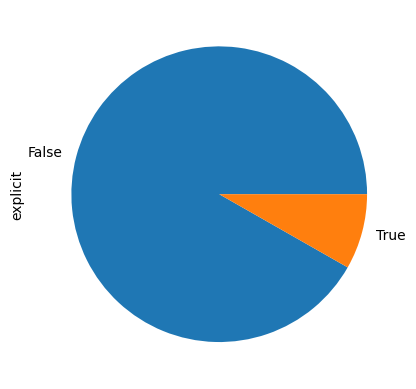

In [103]:
plot_categoricals(df,[ 'key', 'mode', 'time_signature', 'track_genre'])
df['explicit'].value_counts().plot.pie()

Como podemos ver não existe nada de errado nas variáveis escolhidas, a escala musical é bastante variável porém a maioria das músicas sao feitas em escala maior. A predominância é musicas com o compasso 4/4 como o esperado e com a letra nao explicita.

### Variáveis numéricas

In [104]:
df.drop(['Unnamed: 0','track_id', 'artists', 'album_name', 'track_name', 'explicit', 'key', 'mode', 'time_signature', 'track_genre'], axis=1).describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,113366.000000,1.133660e+05,113366.000000,113366.000000,113366.000000,113366.000000,113366.000000,113366.000000,113366.000000,113366.000000,113366.000000
mean,33.297100,2.279813e+05,0.566808,0.641103,-8.238510,0.079904,0.312180,0.156922,0.210602,0.474435,122.291982
std,22.350925,1.070119e+05,0.173924,0.251811,5.022839,0.084771,0.331343,0.310199,0.186248,0.259567,29.920680
min,0.000000,0.000000e+00,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.742130e+05,0.455000,0.471000,-9.976750,0.035800,0.016600,0.000000,0.097800,0.259000,99.664000
50%,35.000000,2.129330e+05,0.580000,0.684000,-6.986000,0.048700,0.166000,0.000045,0.131000,0.464000,122.040000
75%,50.000000,2.613980e+05,0.695000,0.854000,-4.994000,0.083400,0.589000,0.051100,0.270000,0.684000,140.094750
max,100.000000,5.237295e+06,0.985000,1.000000,4.532000,0.899000,0.996000,1.000000,1.000000,0.995000,243.372000


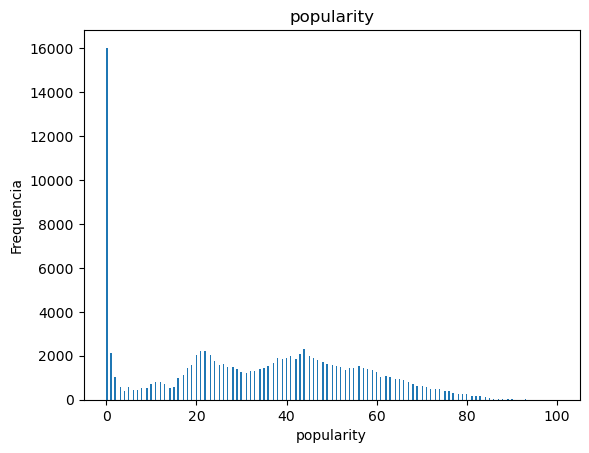

In [105]:
num_rows = df.shape[0]
bins = int(np.sqrt(num_rows))

copy = df.copy()

def plot_column(df, column):
    plt.figure()
    df[column].plot.hist(bins=bins)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequencia')
    plt.show()
    
plot_column(copy, 'popularity')

Na coluna popularidade, percebemos que existe um numero grande de músicas com popularidade 0. Vamos plotar um exemplo para tentar entender melhor esse comportamento.

In [106]:
df[df['popularity'] == 0].head(1)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
23,23,0BUuuEvNa5T4lMaewyiudB,Jason Mraz,Coffee Moment,93 Million Miles,0,216386,False,0.572,0.454,...,-10.286,1,0.0258,0.477,0.000014,0.0974,0.515,140.182,4,acoustic


A musica acima é bastante famosa, no seu videoclip no youtube ela contem mais de 123 milhões de acesso, o que nao é coerente com a popularidade nula.

Videoclip da musica 93 Million Miles: https://www.youtube.com/watch?v=bcQwIxRcaYs

Vamos procurar o nome dessa musica na base de dados para ver se existe uma duplicação

In [107]:
df[df['track_name'] == '93 Million Miles'].head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
23,23,0BUuuEvNa5T4lMaewyiudB,Jason Mraz,Coffee Moment,93 Million Miles,0,216386,False,0.572,0.454,...,-10.286,1,0.0258,0.477,0.000014,0.0974,0.515,140.182,4,acoustic
75,75,38jy6kRlPt8z1GUS9WXeNh,Jason Mraz,Love Is a Four Letter Word,93 Million Miles,67,216386,False,0.572,0.454,...,-10.286,1,0.0258,0.477,0.000014,0.0974,0.515,140.182,4,acoustic
91670,91670,0BUuuEvNa5T4lMaewyiudB,Jason Mraz,Coffee Moment,93 Million Miles,0,216386,False,0.572,0.454,...,-10.286,1,0.0258,0.477,0.000014,0.0974,0.515,140.182,4,rock


Como podemos observar, existem 3 versões da mesma música na base de dados e apenas uma delas possui uma popularidade não nula e coerente de 67 (ja que 75% da base de dados possui uma popularidade inferior a 50). Sabemos que se trata da mesma musica pois todas as outras características dela sao iguais e possuem o mesmo artista. A única coisa que esta diferente é o gênero musical, o que vale conferir se isso foi um erro ou se uma musica que se encaixa em 2 gêneros ou mais sera duplicada na base de dados ja que o track id é o mesmo

Ao verificar no aplicativo do spotify, percebemos que de fato essa musica está em 2 álbuns no spotify, porém a versão com popularidade é a original encontrada no perfil do artista. As musicas nesse caso que nao tem popularidade sao de um album chamado Coffe Moment criado em 2022 sendo que a musica original foi lançada em 2012.

Musica do album Coffe Moment: https://open.spotify.com/track/0BUuuEvNa5T4lMaewyiudB?si=nTT51id5T-aD0WvB9_iAqg

Musica original do album correto: https://open.spotify.com/track/38jy6kRlPt8z1GUS9WXeNh?si=ifQXYzlPSneRTUwgCGyN7g

Vamos identificar as musicas com o mesmo nome:

In [108]:
df.sort_values(by=['track_name']).head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
36750,36750,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,!I'll Be Back!,52,178533,True,0.823,0.6120,...,-7.767,1,0.2480,0.168000,0.00000,0.1090,0.6880,142.959,4,french
92751,92751,1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,"""A"" You're Adorable",39,151680,False,0.615,0.3750,...,-10.362,0,0.0319,0.482000,0.00000,0.1110,0.9220,110.720,4,rockabilly
66970,66970,1B45DvGMoFWdbAEUH2qliG,Little Apple Band,The Favorite Songs Of Sesame Street,"""C"" IS FOR COOKIE",32,84305,False,0.553,0.8120,...,-5.542,1,0.0558,0.132000,0.00001,0.0794,0.8710,118.368,4,kids
66996,66996,73lXf5if6MWVWnsgXhK8bd,Little Apple Band,Sesame Street and Friends,"""C"" is for Cookie",8,86675,False,0.664,0.6110,...,-8.687,1,0.0886,0.120000,0.00000,0.0408,0.7580,118.443,4,kids
101161,101161,0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,Classical Christmas,"""Christe, Redemptor omnium""",0,289133,False,0.111,0.0568,...,-28.053,1,0.0551,0.990000,0.69700,0.1100,0.0395,169.401,1,sleep
82584,82584,5Zx0Rrkn5RFBMD2PRxX3mI,Dillinger Four,C I V I L W A R,"""Contemplate This on the Tree of Woe.""",24,180706,False,0.565,0.9770,...,-3.592,1,0.0546,0.028200,0.00132,0.4330,0.3870,106.478,4,power-pop
5980,5980,3ozivYJGJGq6TSzdy8m64X,Capcom Sound Team,デビル メイ クライ 3 オリジナル・サウンドトラック,"""DEVILS NEVER CRY""(スタッフロール)",55,319906,False,0.264,0.9510,...,-7.356,1,0.1460,0.000894,0.04420,0.1270,0.1590,149.990,4,anime
93397,93397,3KKk48f33mlB56F5L5nbJk,Nikolay Kopylov,Popular Opera Arias,"""Don Carlos"" Roderigo'S Death Aria",0,235547,False,0.167,0.3320,...,-9.888,1,0.0359,0.992000,0.19100,0.1130,0.0527,62.970,4,romance
93440,93440,3KKk48f33mlB56F5L5nbJk,Nikolay Kopylov,Popular Opera Arias,"""Don Carlos"" Roderigo'S Death Aria",0,235547,False,0.167,0.3320,...,-9.888,1,0.0359,0.992000,0.19100,0.1130,0.0527,62.970,4,romance
93895,93895,5OiONTndVC5YOMXg6VC5xs,Nikolay Kopylov,Popular Opera Arias,"""Eugene Onegin"" Ariozo Of Onegin",0,111800,False,0.443,0.5140,...,-8.068,1,0.0924,0.988000,0.00187,0.0918,0.2440,100.752,4,romance


 Percebemos que existe músicas com id diferente com nome e artista iguais com popularidade diferente. O que é o caso de *C" IS FOR COOKIE* que apesar de ser a mesma musica possui valores bem diferentes. Dessa maneira vamos verificar a quantidade de musicas que entram nessa questão.

In [109]:
df.groupby(['track_name', 'artists']).size().sort_values(ascending=False).head(3000)

track_name                      artists               
Run Rudolph Run                 Chuck Berry               151
Little Saint Nick - 1991 Remix  The Beach Boys             76
Last Last                       Burna Boy                  75
Frosty The Snowman              Ella Fitzgerald            69
Christmas Time                  Bryan Adams                66
                                                         ... 
決戦スピリット                         CHiCO with HoneyWorks       3
Outro Lugar                     Detonautas Roque Clube      3
Corazón Sin Vida                Aitana;Sebastian Yatra      3
Outro Alguém                    Maneva                      3
Me Voy Enamorando               Chino & Nacho               3
Length: 3000, dtype: int64

O numero é bastante consideravel, dessa maneira nao podemos remover todas as musicas que possuim duplicadas pois isso eliminaria uma quantidade siginificante. Assim vamos observar o caso que mais aparece.

In [110]:
df[df['track_name'] == 'Run Rudolph Run'].drop_duplicates(subset=['track_id']).head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8163,8163,1S4rxDloMtAduogKeiJZmR,Chuck Berry,CHRISTMAS TOP HITS 2022,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,blues
8164,8164,03MW3H9B2P7tgpvzG3klNI,Chuck Berry,pov: you hear the bells jingle,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,blues
8165,8165,52MCmoSCtPRbVN5Njdo6G5,Chuck Berry,Weihnachten Playlist,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,blues
8166,8166,7m4luTtlene5vS6xUvWxRt,Chuck Berry,Holidays Are Coming,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,blues
8168,8168,3RXAcz7Sa6JDZSxcH1EEQ6,Chuck Berry,Best Christmas Songs 2022 | For under the Mist...,Run Rudolph Run,1,162897,False,0.647,0.876,...,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,blues
8172,8172,7pO8TsOPKQCgFVLYkoCiFV,Chuck Berry,Santa Claus Is Coming To Town,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,blues
8173,8173,0GZpxW1UfoInSJug7m34fR,Chuck Berry,Classic Christmas 2022,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,blues
8174,8174,0qyMrxLDdU14grB9GWndxa,Chuck Berry,Best Christmas Music 2022,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,blues
8175,8175,0UfbRLBZi1780FbGc07dg0,Chuck Berry,Home At Christmas,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,blues
8176,8176,1Jc5rVFIyOy6XO3ATB1Lh9,Chuck Berry,World's Best Christmas Playlist,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,blues


Ao analisar com detalhes, percebemos que as musicas podem ter valores diferentes e popularidade diferente. Dessa maneira optamos por manter todas as duplicadas e descartar apenas as que sao identicas e possuem generos diferente.

Vamos agora conferir se as musicas com o mesmo id duplicadas mudam apenas o genero

In [111]:
df[df.duplicated(subset=['track_id'], keep=False)].sort_values(by=['track_id'])

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
103211,103211,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,...,-6.644,0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4,soul
15028,15028,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,...,-6.644,0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4,chill
100420,100420,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,...,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,ska
85578,85578,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,...,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,punk-rock
2106,2106,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,...,-5.230,1,0.0747,0.001210,0.000000,0.0995,0.236,148.033,4,alt-rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22326,22326,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,...,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,death-metal
72679,72679,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,...,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,metalcore
3100,3100,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,...,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alternative
91401,91401,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,...,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,rock


A hipotese anterior é verdadeira. Dessa maneira decidimos por descartar essa coluna dos nossos modelos primeiramente pois seria necessario incorporar todos os generos a uma unica linha, o que dificulta essa tarefa quando percebemos que existe varios generos diferentes.

Essa decisao faz sentido pois a categoria do genero escolhida pelo artista é bastante subjetiva, assim fazendo mais sentido uma recomentação de musicas com caracteristicas parecidas.

In [112]:
df['track_genre'].nunique()

114

Com essa consideração podemos agora remover todas as musicas duplicadas com o mesmo track_id

In [113]:
df = df.drop_duplicates(subset=['track_id'])

Vamos observar agora as outras colunas

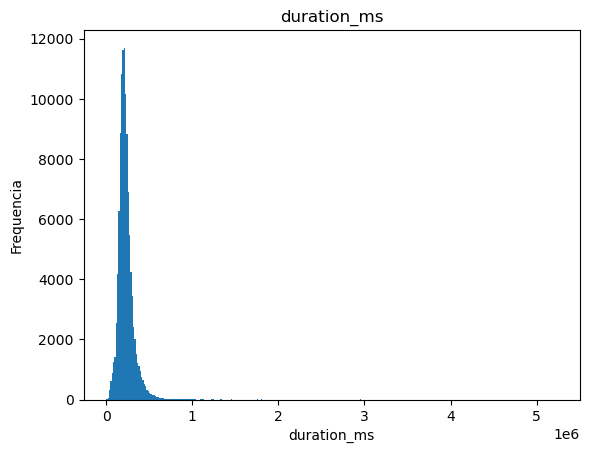

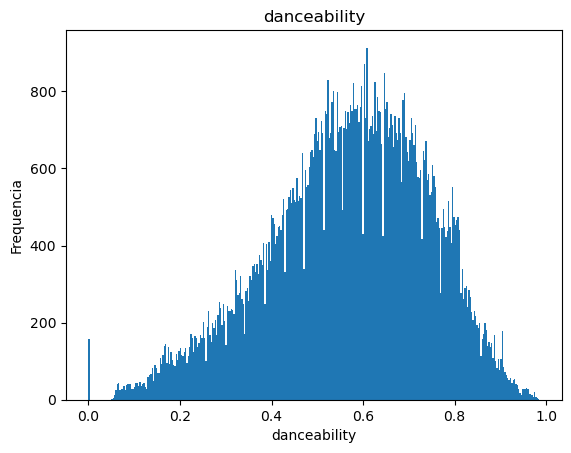

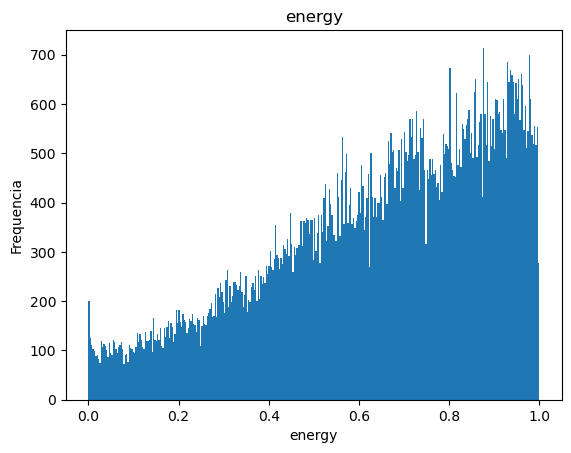

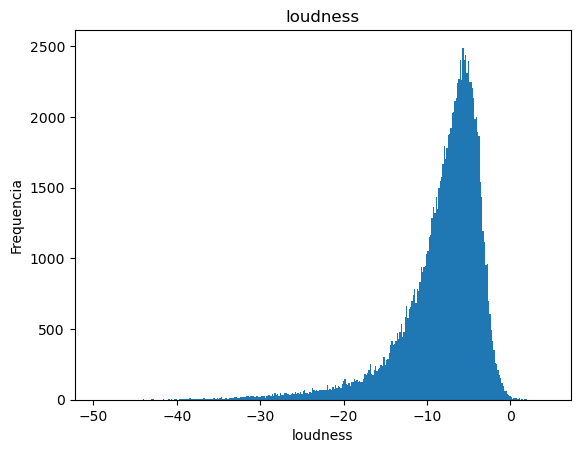

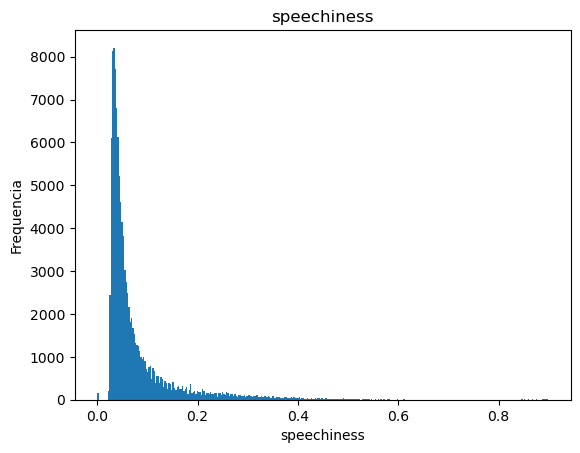

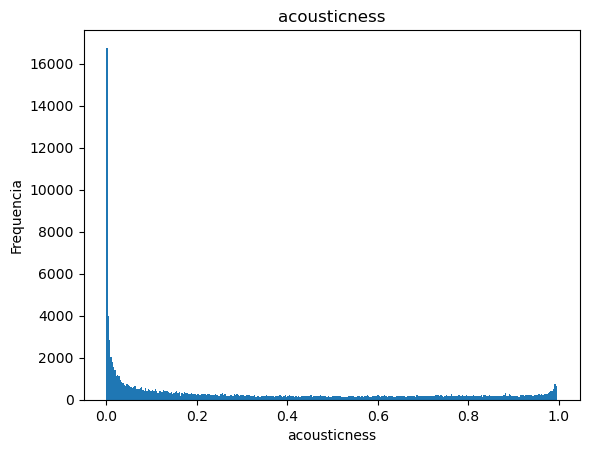

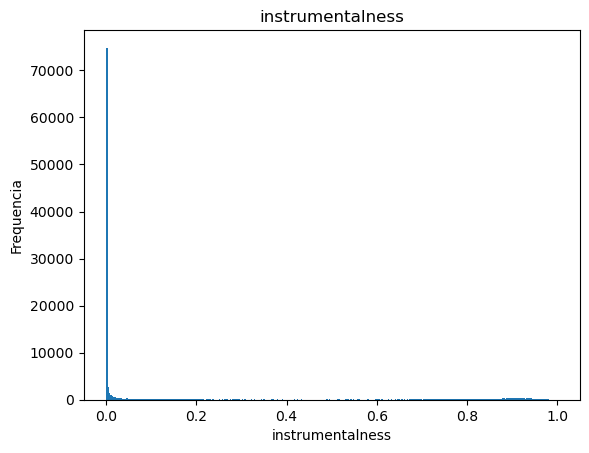

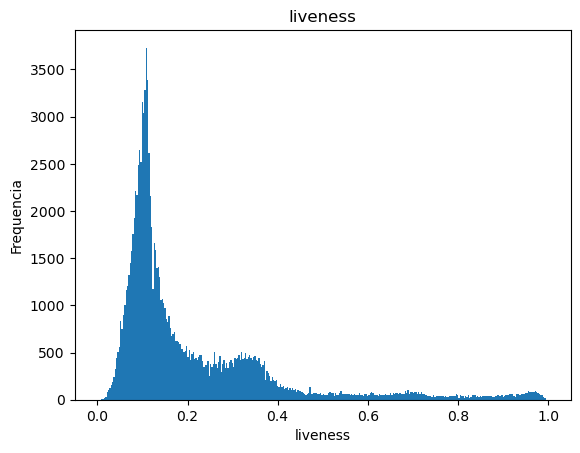

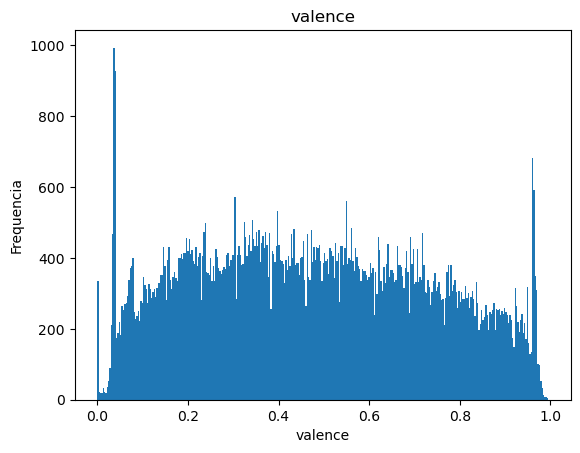

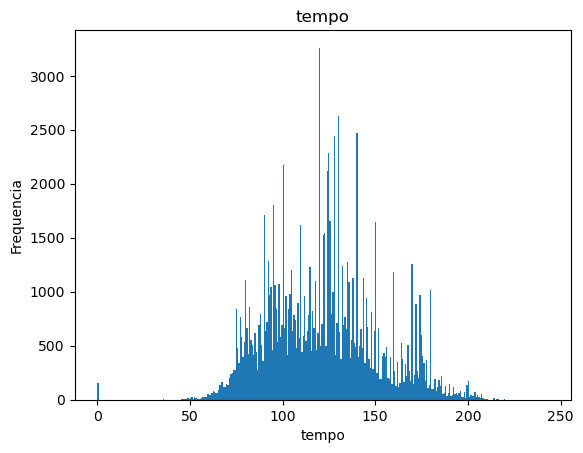

In [114]:
for column in copy.drop(['popularity','Unnamed: 0','track_id', 'artists', 'album_name', 'track_name', 'explicit', 'key', 'mode', 'time_signature', 'track_genre'], axis=1).columns:
    plot_column(copy, column)

Todas as outras colunas estao de acordo com o esperado, algumas delas possuem varias recorrencias em zero pois essas caracteristicas nem sempre fazem sentido com toda a base de dado, como por exemplo qualquer musica que possui apenas falas ou barulhos aletorios nao pode ser avaliado em danceability e energy.

In [115]:
df[df['energy'] == 0]['track_name'].value_counts().head(10)

Pure White Noise - Loopable with No Fade    1
Name: track_name, dtype: int64

In [116]:
df[df['danceability'] == 0]['track_name'].value_counts().head(10)

Soothing Brown Noise Waves                       3
The Early Morning Rain                           3
Pure Brown Noise                                 3
Pure Brown Noise - Loopable with no fade         3
Pure Brown Noise - Loopable with No Fade         2
Spa Rain                                         2
Buffered White Noise                             2
Deeper Sounding Vacuum Cleaner 2 - Stationary    2
Continuous Rain                                  2
Pouring Rain - Loopable with No Fade             2
Name: track_name, dtype: int64

Apos todos esses filtros, ainda mesmo continuamos com vairas musicas para treinar nosso modelo

In [117]:
df.shape

(89111, 21)

## Algorítmo de Rcomendação KNN

Vamos utilizar o algorítimo KNN para determinar a similaridade entre musicas e recomendar musicas similares. Para esta análise iremos levar em conta apenas as colunas contendo variaveis numéricas.

Na célula abaixo iremos selecionar as colunas desejadas e normaliza-las.

In [118]:
features = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 
            'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# We instantiate the MinMaxScaler
mms = MinMaxScaler()

# We fit and transform the features
df[features] = mms.fit_transform(df[features])


Em seguida, iremos passar o dataset normalizado para o algorítimo KNN com a métrica cosseno.

In [119]:
knn = NearestNeighbors(metric='cosine') 

# Here we only keep the columns we are interested in
X = df[features]

knn.fit(X)


NearestNeighbors(metric='cosine')

Abaixo é definido uma função que recebe o nome de uma musica e retorna n musicas mais similares.

In [120]:
def recommend_songs(song_id, num_recommendations):
    song = df[df['Unnamed: 0'] == song_id]
    song_features = song[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 
            'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
    
    # Use the KNN model to find k nearest neighbors
    distances, indices = knn.kneighbors(song_features, n_neighbors=num_recommendations+1)
    
    # Get list of ids for song recommendations
    rec_indices = indices.flatten()[1:]
    recommended_songs = df.loc[rec_indices]
    
    return recommended_songs


Para testar vamos escolher alguma musica do nosso dataset e ver quais musicas são recomendadas. A música escolhida foi "Lucky" do Jason Mraz. O valor que precisamos passar para o dataset é o da coluna Unnamed: 0. Que corresponde ao id do dataset. Neste caso o valor 8.

In [121]:
df.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,0.73,0.044043,False,0.686294,0.4610,...,0.791392,0,0.159066,0.032329,0.000001,0.3580,0.718593,0.361245,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.55,0.028566,False,0.426396,0.1660,...,0.597377,1,0.084872,0.927711,0.000006,0.1010,0.268342,0.318397,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.57,0.040255,False,0.444670,0.3590,...,0.736123,1,0.061958,0.210843,0.000000,0.1170,0.120603,0.313643,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0.71,0.038557,False,0.270051,0.0596,...,0.573701,1,0.040378,0.908635,0.000071,0.1320,0.143719,0.746758,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,0.82,0.037969,False,0.627411,0.4430,...,0.737103,1,0.058509,0.470884,0.000000,0.0829,0.167839,0.492863,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,0.58,0.040907,False,0.698477,0.4810,...,0.753269,1,0.116796,0.290161,0.000000,0.1890,0.669347,0.402746,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,0.74,0.043801,False,0.413198,0.1470,...,0.752992,1,0.039488,0.860442,0.000003,0.0913,0.076884,0.580527,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,0.80,0.046388,False,0.713706,0.4440,...,0.743577,1,0.046385,0.561245,0.000000,0.0973,0.715578,0.620285,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,0.74,0.036204,False,0.634518,0.4140,...,0.755249,1,0.041046,0.295181,0.000000,0.1510,0.672362,0.534523,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,0.56,0.039256,False,0.448731,0.6320,...,0.790948,1,0.032814,0.427711,0.004190,0.0735,0.196985,0.324191,4,acoustic


Podemos ver melhor as caracteristicas da musica escolhida na célula abaixo.

In [122]:
song = df[df['Unnamed: 0'] == 8]
song

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,0.74,0.036204,False,0.634518,0.414,...,0.755249,1,0.041046,0.295181,0.0,0.151,0.672362,0.534523,4,acoustic


Ao escutar essa musica, percebemos que se trata te uma musica alegre com uma melodia simples em violão e letra na musica toda. O que pode ser verificado pelas características na base de dado.

link da musica: https://www.youtube.com/watch?v=acvIVA9-FMQ

In [123]:
recommended_songs = recommend_songs(8, 5)  # Here, 8 is the id of the song, and 5 is the number of songs you want to recommend

# Transform into dataframe to be shown like a table
recommended_songs = pd.DataFrame(recommended_songs)
recommended_songs

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
18,18,2qLMf6TuEC3ruGJg4SMMN6,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,0.68,0.036204,False,0.634518,0.414,...,0.755249,1,0.041046,0.295181,0.000000,0.151,0.672362,0.534523,4,acoustic
44574,44574,1B8WdDScvobpFsZLfdmIE1,Linkin Park,Hybrid Theory,A Place for My Head,0.45,0.035255,False,0.612183,0.908,...,0.818989,1,0.204672,0.014458,0.000000,0.671,0.459296,0.546747,4,grunge
17650,17650,18uMuvNai5GtXxw4q8qjKR,Oklou;Casey MQ,For the Beasts,Lurk,0.40,0.029258,False,0.774619,0.268,...,0.579676,0,0.058065,0.986948,0.936000,0.088,0.845226,0.432650,4,club
69195,69195,4lrKVSLsKc7R8ggs1SX08n,Job Kurian;Rita,Urumi (Original Motion Picture Soundtrack),Aaranne Aaranne,0.39,0.031355,False,0.609137,0.358,...,0.741672,1,0.828699,0.775100,0.000026,0.359,0.691457,0.705665,3,malay
47599,47599,7ikJw7nFIbtKlRx97TZ2aB,Raimundos,Acústico - Ao Vivo,O Pão da Minha Prima / Monkey Man - Ao Vivo | ...,0.38,0.036565,True,0.614213,0.928,...,0.849009,1,0.043382,0.169679,0.000000,0.761,0.726633,0.553671,4,hard-rock


Percebemos que a musica que ele recomendou é a mesma em outro album, com valores um pouco diferentes. Isso faz muito sentido pois quanto mais parecida a musica mais recomendado ela deve ser. Para contornar isso para uma aplicação final sera suficiente apenas aplicar um filtro nas recomendações para evitar musicas com o mesmo nome e artista.
Ao escutar as outras musicas percebemos que elas tem  algumas características bem parecidas com a musica escolhida, porem percebemos que ele pode recomendar gêneros muito opostos, então apesar de possuir características muito próximas, o gênero da musica deve ser levado em conta para um refinamento do algoritmo.

## Análise de correlação

In [124]:
numerical_data = df.select_dtypes('number').drop(columns='popularity').copy()
target = df['popularity'].copy()

In [125]:
numerical_data.corrwith(target).sort_values()

instrumentalness   -0.129663
acousticness       -0.034096
speechiness        -0.025998
duration_ms        -0.023269
mode               -0.015866
valence            -0.012335
liveness           -0.004291
key                 0.003046
tempo               0.004343
energy              0.014453
Unnamed: 0          0.033011
time_signature      0.034703
danceability        0.064404
loudness            0.069490
dtype: float64

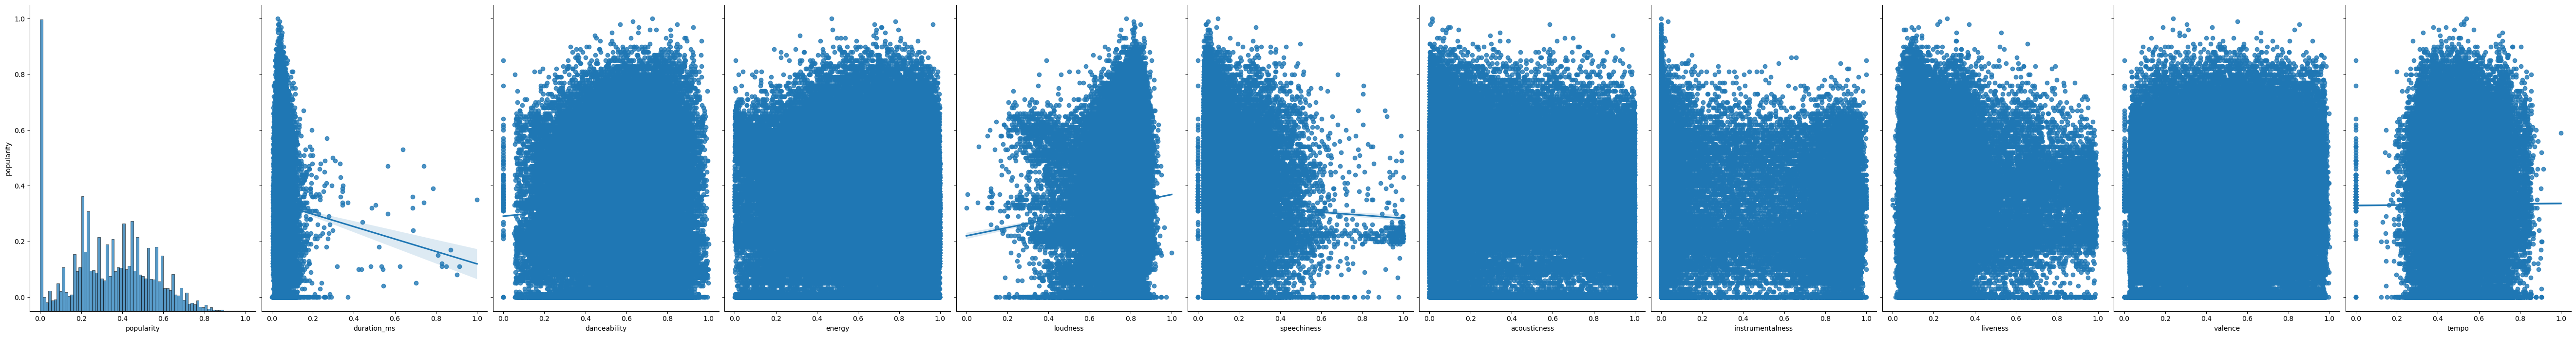

In [126]:
import seaborn as sns
sns.pairplot(df, x_vars=['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'], y_vars='popularity', height=7, aspect=0.7, kind='reg')


Como podemos obsetvar, os graficos de correlação entre as variaveis numéricas não nos dizem muito sobre a correlação entre elas. Portanto, iremos prosseguir com um modelo com rede neural ao invez de um modelo de regressão linear.

## Rede Neural para prever popularidade

Agora vamos criar uma rede neural capaz de prever a popularidade de uma musica, dado suas características.

Imports:

In [60]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

Vamos definir defice com preferencia para GPU para acelerar o treinamento da rede neural:

In [61]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Agora vamos carregar o dataset novamente e separar em treino e teste com as colunas desejadas:

In [62]:
# Load your data
df = pd.read_csv("spotify_data.csv")
copy = df.copy()

# Categorical features that you want to use
categorical_columns = ['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'key', 'mode', 'time_signature', 'track_genre']
for category in categorical_columns:
    le = LabelEncoder()
    df[category] = le.fit_transform(df[category])

# Continuous features that you want to use
continuous_columns = [ 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
mms = MinMaxScaler()
df[continuous_columns] = mms.fit_transform(df[continuous_columns])

# Split the data into train and test
train, test = train_test_split(df, test_size=0.2, random_state=42)

Em seguida vamos definir uma classe definindo o dataset em formato de tensor e uma classe com a arquitetura da rede neural:

In [63]:
# PyTorch Dataset
class SpotifyDataset(Dataset):
    def __init__(self, data, cat_cols, cont_cols):
        self.n = data.shape[0]
        self.y = torch.from_numpy(data.popularity.values).float().unsqueeze(1).to(device)
        self.cat_cols = cat_cols
        self.cont_cols = cont_cols
        self.x_cat = torch.from_numpy(data[cat_cols].values).long().to(device)
        self.x_cont = torch.from_numpy(data[cont_cols].values).float().to(device)

    def __len__(self):
        return self.n

    def __getitem__(self, idx):
        return self.x_cat[idx], self.x_cont[idx], self.y[idx]

# Define the model
class NCF(nn.Module):
    def __init__(self, embedding_sizes, num_numerical_cols, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni[0], ni[1]).to(device) for ni in embedding_sizes])
        self.embedding_dropout = nn.Dropout(p)
        self.batch_norm_num = nn.BatchNorm1d(num_numerical_cols)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_sizes))
        input_size = num_categorical_cols + num_numerical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i).to(device))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size).to(device))

        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical, x_numerical):
        embeddings = []
        for i, e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:, i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)

        x_numerical = self.batch_norm_num(x_numerical)
        x = torch.cat([x, x_numerical], 1)
        x = self.layers(x)
        return x

Preparando o dataset para treino:

In [64]:
# Training the model
train_dataset = SpotifyDataset(train, categorical_columns, continuous_columns)
test_dataset = SpotifyDataset(test, categorical_columns, continuous_columns)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


# Choose embedding size
embedding_size = 50
embedding_sizes = [(len(df[col].unique()), min(50, (len(df[col].unique())+1)//2)) for col in categorical_columns]
# Instantiate the model
model = NCF(embedding_sizes, len(continuous_columns), 1, [200,100,50], p=0.4).to(device)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Loop de treinamento:

In [65]:
# Train the model
epochs = 100

for i in range(epochs):
    i += 1
    agg_losses = []
    for cat_x, cont_x, y in train_loader:
        y = y.to(device)
        cat_x = cat_x.to(device)
        cat_x = cat_x.long()
        cont_x = cont_x.to(device)
        # Forward pass
        preds = model(cat_x, cont_x)
        loss = torch.sqrt(loss_function(preds, y)) # RMSE
        agg_losses.append(loss)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # print(f'epoch: {i:3} loss: {loss:.10f}')
    avg_agg_losses = sum(agg_losses)/len(agg_losses)
    print(f'epoch: {i:3} loss: {avg_agg_losses:.10f}')

epoch:   1 loss: 25.5081291199
epoch:   2 loss: 18.6853809357
epoch:   3 loss: 16.3279304504
epoch:   4 loss: 14.6082487106
epoch:   5 loss: 13.3577194214
epoch:   6 loss: 12.5386075974
epoch:   7 loss: 11.8127307892
epoch:   8 loss: 11.1984405518
epoch:   9 loss: 10.7280464172
epoch:  10 loss: 10.2717256546
epoch:  11 loss: 9.8687229156
epoch:  12 loss: 9.4818639755
epoch:  13 loss: 9.1966171265
epoch:  14 loss: 8.9176063538
epoch:  15 loss: 8.6981220245
epoch:  16 loss: 8.4467983246
epoch:  17 loss: 8.2398376465
epoch:  18 loss: 8.1068572998
epoch:  19 loss: 7.8959488869
epoch:  20 loss: 7.7715153694
epoch:  21 loss: 7.5716929436
epoch:  22 loss: 7.5184426308
epoch:  23 loss: 7.4092006683
epoch:  24 loss: 7.2845926285
epoch:  25 loss: 7.1802029610
epoch:  26 loss: 7.1374015808
epoch:  27 loss: 7.0313987732
epoch:  28 loss: 6.9862303734
epoch:  29 loss: 6.9032588005
epoch:  30 loss: 6.8093519211
epoch:  31 loss: 6.7684526443
epoch:  32 loss: 6.7184972763
epoch:  33 loss: 6.6254558563


Testando o modelo:

In [66]:
#After training, you can evaluate the model on the test set.
model.eval() # set the model to evaluation mode
with torch.no_grad(): # turn off gradients for the upcoming steps
    test_losses = []
    for cat_x, cont_x, y in test_loader:
        y = y.to(device)
        cat_x = cat_x.to(device)
        cat_x = cat_x.long()
        cont_x = cont_x.to(device)
        # Forward pass
        preds = model(cat_x, cont_x)
        loss = torch.sqrt(loss_function(preds, y)) # RMSE
        test_losses.append(loss.item())
    avg_test_loss = sum(test_losses) / len(test_losses)
print(f'Test Loss: {avg_test_loss:.10f}')

Test Loss: 7.8243640638


Com os testes, podemos observar que o modelo apresenta um leve overfitting, mas nada preocupante. Podemos observar também que o modelo apresenta um loss relativamente baixo. Portanto, podemos concluir que o modelo é capaz de prever a popularidade de uma musica com uma boa precisão. Porem vale ressaltar que uma musica apenas com caracteristicas de maior popularidade nao siginifica que ela tera de fato, uma vez que o genero, lingua pode impactar bastante no publico alvo.